## Google play store data in EDA:

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading and Exploration and Cleaning:

In [75]:
df=pd.read_csv('googleplaystore.csv')

In [76]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Set options to be maximum for rows and columns:


In [77]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Hide all warnings: (sometime uneccessary warnings will comes)
import warnings
warnings.filterwarnings('ignore')

In [78]:
print(f" The number of index are: {df.columns}")

 The number of index are: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [79]:
print(f"The numbers of rows are: {df.shape[0]}, and columns are {df.shape[1]}")

The numbers of rows are: 10841, and columns are 13


## Run automatic EDA using ydata_profiling:

In [80]:
# import ydata_profiling as yd
# import os
# os.makedirs("Pandas_tips_and_tricks/outputs", exist_ok=True)
# profile=yd.ProfileReport(df)
# profile.to_file("Pandas_tips_and_tricks/outputs/googleplaystore.html")

In [81]:
df.describe() #summary of data or describe columns will show just numberic columns

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [83]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9721,Decay: The Mare - Ep.1 (Trial),GAME,3.6,5291,7.2M,"100,000+",Free,0,Teen,Adventure,"May 24, 2014",2.0,2.2 and up
1261,Lose Weight in 30 Days,HEALTH_AND_FITNESS,4.8,220125,11M,"10,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",1.0.14,4.0 and up


In [84]:
df['Size'].isnull().sum()

np.int64(0)

In [85]:
# Find the values having M in them:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

In [86]:
# Find the values having k in them:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [87]:
# Find the values having Varies with device in them:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [88]:
1695+316+8829

10840

In [89]:
len(df)

10841

In [90]:
# Convert the whole size columns into bytes

#let's define  a function:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', ""))* 1024
        elif 'M' in size:
            return float(size.replace('M', ""))*1024 *1024
        elif 'Varies with devices' in size:
            return np.nan
    return size

In [91]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [92]:
df['Size']=df['Size'].apply(convert_size)

In [93]:
df['Size']

0                19922944.0
1                14680064.0
2                 9122611.2
3                26214400.0
4                 2936012.8
5                 5872025.6
6                19922944.0
7                30408704.0
8                34603008.0
9                 3250585.6
10               29360128.0
11               12582912.0
12               20971520.0
13               22020096.0
14               38797312.0
15                2831155.2
16                5767168.0
17               17825792.0
18               40894464.0
19               32505856.0
20               14680064.0
21               12582912.0
22                4404019.2
23                7340032.0
24               24117248.0
25                6291456.0
26               26214400.0
27                6396313.6
28                4823449.6
29                4404019.2
30                9646899.2
31                5452595.2
32               11534336.0
33               11534336.0
34                4404019.2
35                96

In [94]:
df.rename(columns= {'Size':'Size_in_bytes'}, inplace=True)

In [95]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Convert size into mega_bytes:

In [96]:
# df['Size_in_Mb']=df['Size_in_bytes'].apply(lambda x:  x/ (1024*1024))
# convert to numeric
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

# now convert bytes → MB
df['Size_in_Mbs'] = df['Size_in_bytes'] / (1024 * 1024)


In [97]:
df['Size_in_kbs']=df['Size_in_bytes'].apply(lambda x: x/1024)

In [98]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Size_in_kbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


In [99]:
print(f"The number of columns is: {df.columns}")

The number of columns is: Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Size_in_kbs'],
      dtype='object')


In [100]:
# df.drop('Size_in_Mb', axis=1, inplace=True)


## Let's check the install columns:

In [101]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [102]:
df['Installs'].nunique()

22

In [103]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [104]:
df['Installs'].isnull().sum()

np.int64(0)

## `Install columns`
1. remove + sign,

2. remove ,

3. convert columns into an integers 

In [105]:
# df['Installs']= df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x) #according to sir but gave me type change in error

In [106]:
# df['Installs']= df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)#according to sir but gave me type change in error

In [107]:
# df['Installs']= df['Installs'].apply(lambda x: int(x))  which gave me chatgpt and no error and type change easily
# Remove '+' and ',' from values
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
# Convert safely to numbers
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Replace NaN (non-numeric values) with 0
df['Installs'] = df['Installs'].fillna(0).astype(int)


In [108]:
df['Installs'].dtype

dtype('int64')

In [109]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

In [110]:
df['Installs'].max()

np.int64(1000000000)

In [111]:
df['Installs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
10841 non-null  int64
dtypes: int64(1)
memory usage: 84.8 KB


In [112]:
# making a new columns called 'Installs_category' which will have the category of the intalls:
bins=[-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000,10000000000]
labels= ['no', 'Very low', 'low', 'Moderate', 'More than moderate', 'high', 'very high', 'top notch']
df['Installs_Category']=pd.cut(df['Installs'], bins=bins, labels=labels)# 

In [113]:
df['Installs_Category'].value_counts()# installs columns check and then binning

Installs_Category
low                   2161
high                  2118
very high             2004
More than moderate    1648
Moderate              1531
top notch              828
Very low               535
no                      16
Name: count, dtype: int64

In [114]:
2161+2118+2004+1648+1531+828+535+16

10841

In [115]:
df.describe()

,Rating,Size_in_bytes,Installs,Size_in_Mbs,Size_in_kbs
count,9367.000000,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546291e+07,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502557e+07,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [116]:
df['Reviews'].value_counts()

Reviews
0           596
1           272
2           214
3           175
4           137
5           108
6            97
7            90
8            74
9            65
10           64
12           60
11           52
13           49
17           48
19           41
14           41
20           35
21           35
16           35
15           31
24           30
25           30
30           30
38           29
18           27
22           26
27           25
23           25
33           24
28           24
26           22
41           22
29           20
32           20
31           19
35           18
39           18
36           17
48           17
37           17
45           17
54           17
44           16
52           15
40           15
64           15
34           14
43           14
53           14
78           13
114          13
66           13
67           13
69           13
55           13
51           12
47           12
88           12
60           12
80           12
42           12


In [117]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews'].describe()



count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [118]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mbs,Size_in_kbs
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [119]:
df['Price'].nunique()

93

In [120]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$3.49           7
$29.99          7
$7.99           7
$24.99          7
$5.49           6
$19.99          6
$12.99          5
$6.49           5
$8.99           5
$11.99          5
$2.00           3
$10.00          3
$16.99          3
$1.00           3
$7.49           2
$17.99          2
$8.49           2
$10.99          2
$79.99          2
$9.00           2
$39.99          2
$1.70           2
$3.95           2
$13.99          2
$33.99          2
$15.99          1
$1.50           1
$400.00         1
$74.99          1
$25.99          1
$3.88           1
$4.84           1
$1.76           1
$3.02           1
$4.77           1
$1.59           1
$2.50           1
$1.29           1
$1.61           1
$5.00           1
$299.99         1
$37.

## Let's see how many values have $  sign:

In [ ]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [122]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('/$'))] .value_counts().sum()

np.int64(10223)

In [123]:
df['Price']= df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [124]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
3.49            7
29.99           7
7.99            7
24.99           7
5.49            6
19.99           6
12.99           5
6.49            5
8.99            5
11.99           5
2.00            3
10.00           3
16.99           3
1.00            3
7.49            2
17.99           2
8.49            2
10.99           2
79.99           2
9.00            2
39.99           2
1.70            2
3.95            2
13.99           2
33.99           2
15.99           1
1.50            1
400.00          1
74.99           1
25.99           1
3.88            1
4.84            1
1.76            1
3.02            1
4.77            1
1.59            1
2.50            1
1.29            1
1.61            1
5.00            1
299.99          1
37.9

In [125]:
# df['Price']= df['Price'].apply(lambda x: float(x))
# remove $ sign aur non-numeric values
df['Price'] = df['Price'].replace('[\$,]', '', regex=True)

# convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [126]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs,Size_in_kbs
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


## Using `f` of string in ```Min, Max, Average``` price of the app:

In [127]:
print(f"The minimum price of app:{df['Price'].min()}$")
print(f"The maximum price of app:{df['Price'].max()}$")
print(f"The average price of the app:{df['Price'].mean()}$")

The minimum price of app:0.0$
The maximum price of app:400.0$
The average price of the app:1.027368081180812$


## Check the `Missing Values` inside the data:

In [128]:
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending=True)

App                   0.00
Category              0.00
Installs              0.00
Genres                0.00
Last Updated          0.00
Installs_Category     0.00
Price                 0.01
Reviews               0.01
Type                  0.01
Content Rating        0.01
Android Ver           0.03
Current Ver           0.07
Rating               13.60
Size_in_bytes        15.64
Size_in_Mbs          15.64
Size_in_kbs          15.64
dtype: float64

## Find the ``Total missing`` values:

In [129]:
df.isnull().sum().sum()

np.int64(6577)

## `Plot` the misssing values:

<Axes: >

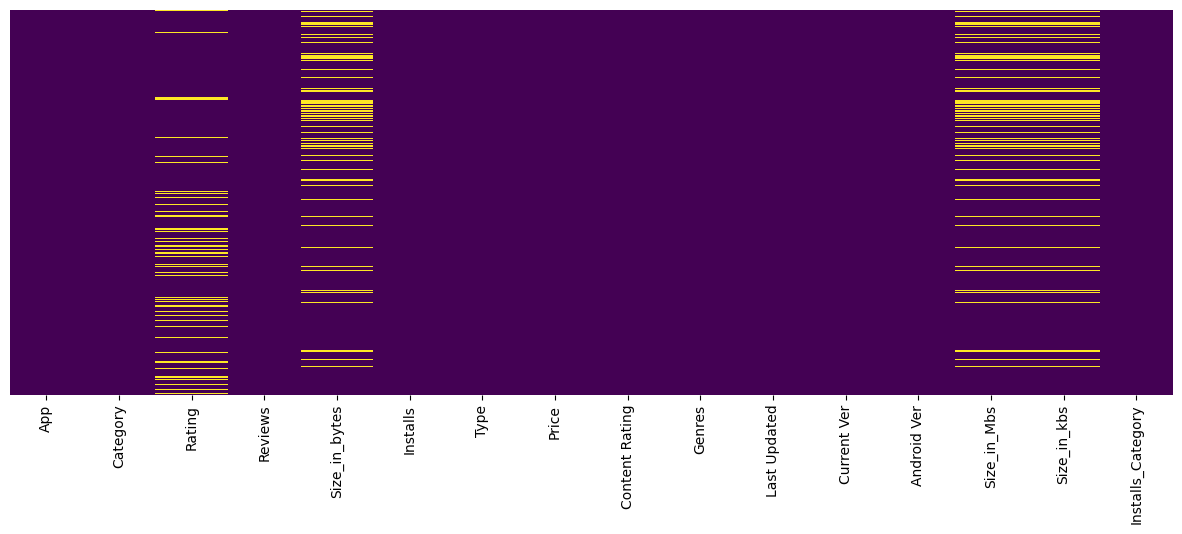

In [130]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing values in each Columns')

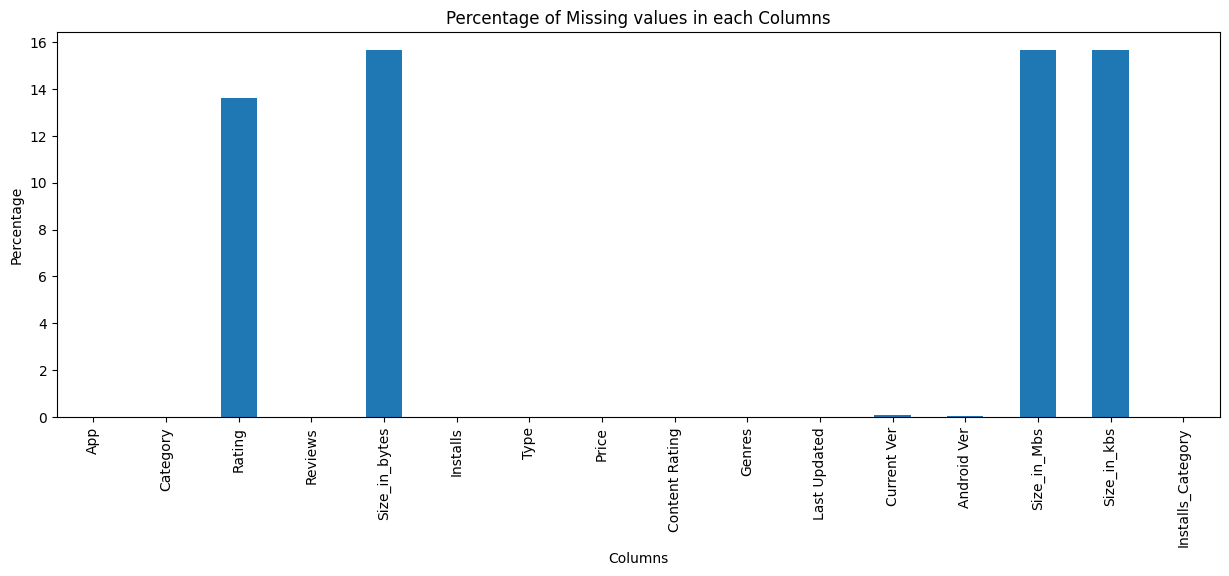

In [131]:
#make figure size:
plt.figure(figsize=(15,5))
#plot the null values by their percentage in each columns:
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
#add the labels:
plt.xlabel('Columns')#add the x-axis label
plt.ylabel('Percentage')#add the y-axis label
plt.title('Percentage of Missing values in each Columns')

Text(0.5, 1.0, 'Percentage of Missing values in each Columns withour rating in columns')

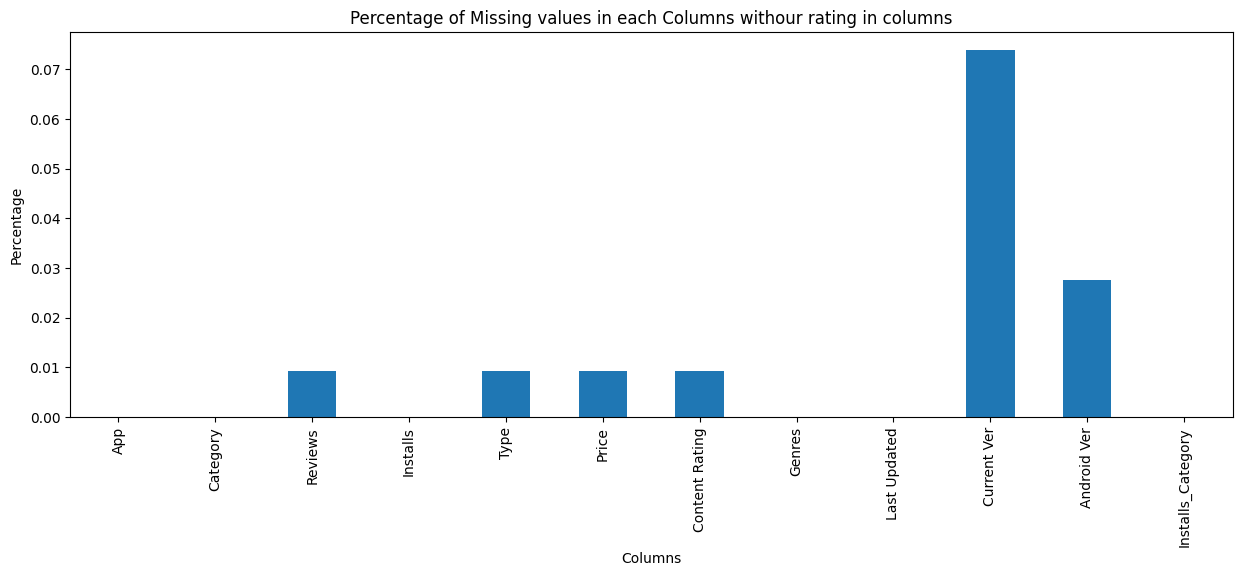

In [132]:
#make figure size:
plt.figure(figsize=(15,5))
missing_percentage[missing_percentage < 1].plot(kind='bar')
#add the labels:
plt.xlabel('Columns')#add the x-axis label
plt.ylabel('Percentage')#add the y-axis label
plt.title('Percentage of Missing values in each Columns withour rating in columns')

In [133]:
df.isnull().sum().sort_values(ascending=True)

App                     0
Category                0
Installs                0
Genres                  0
Last Updated            0
Installs_Category       0
Price                   1
Reviews                 1
Type                    1
Content Rating          1
Android Ver             3
Current Ver             8
Rating               1474
Size_in_bytes        1696
Size_in_Mbs          1696
Size_in_kbs          1696
dtype: int64

In [134]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

App                   0.000000
Category              0.000000
Installs              0.000000
Genres                0.000000
Last Updated          0.000000
Installs_Category     0.000000
Price                 0.009224
Reviews               0.009224
Type                  0.009224
Content Rating        0.009224
Android Ver           0.027673
Current Ver           0.073794
Rating               13.596532
Size_in_bytes        15.644313
Size_in_Mbs          15.644313
Size_in_kbs          15.644313
dtype: float64

In [135]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs,Size_in_kbs
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


## Make correlation matrix of numeric Columns: 

<Axes: >

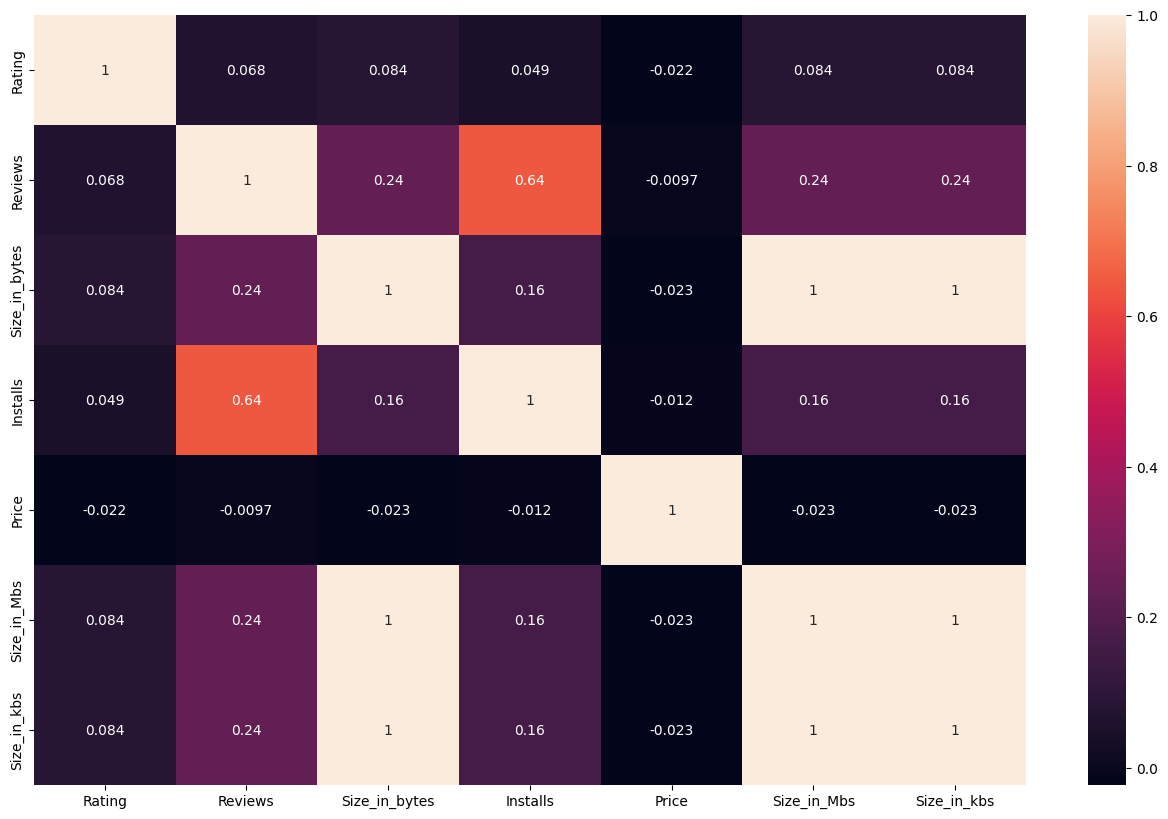

In [136]:
plt.figure(figsize=(16, 10))
numeric_cols=['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mbs', 'Size_in_kbs']
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [ ]:
#Data set which can be search or explore and cleaning the data.